# 필요 라이브러리, 모듈 임포트

In [ ]:
! pip install konlpy
! pip install transformers
! pip install kiwipiepy

In [ ]:
# 임포트 해야 하는 라이브러리 모음

import numpy as np                                      # 넘파이: 스마트한 배열
import pandas as pd                                     # 판다스: 데이터 관련 연산
import matplotlib.pyplot as plt                         # 플롯: 각종 그래프 그리기
import seaborn as sns                                   # 씨본: 히스토그램 그리기
from sklearn.preprocessing import MinMaxScaler          # 사이킷런에서 "최대 최소 정규화" 모듈을 가져오기
from sklearn.preprocessing import StandardScaler        # 사이킷런에서 "표준 정규화" 모듈을 가져오기
from statsmodels.graphics.mosaicplot import mosaic      # 모자이크 플롯 그리기
from scipy import stats as sts                          # 싸이파이: 통계, 공학 라이브러리

# 플롯에 한글 폰트 깨짐 방지(세션 재기동 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

from matplotlib import font_manager, rc
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 43 by 43의 2차원 리스트 생성
matrix = [[0 for _ in range(44)] for _ in range(44)] # 나중에 쓸 오답 행렬이 된다.

# 학생기초정보 불러오기.
## 기본 정제

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 학생기초정보.csv 파일을 인코딩하여 불러오기
data = pd.read_csv('학생기초정보.csv')

# gender 열 범주 카운트
gender_counts = data['gender'].value_counts()
print(gender_counts)

# grade 열 범주 카운트
grade_counts = data['grade'].value_counts()
print(grade_counts)
print("*" * 200)

# 삭제할 열을 정의하고, 삭제하기
columns_to_drop = ['region', 'counselling_purpose', 'gender']
data = data.drop(columns=columns_to_drop)

# data의 "index" 열의 이름을 student_idx로 변경
data = data.rename(columns={"index": "student_idx"})

# grade 열의 정보를, 상은 3, 중은 2, 하는 1로 범주화
data['grade'] = data['grade'].replace({'상': 3, '중': 2, '하': 1})

# student_idx 열을 뒤에서 4자리만 취한 후, 정수형으로 변경
data['student_idx'] = data['student_idx'].str[-4:].astype(int)

# 최종 결과
display(data.head(17))
print("*" * 200)

# 인포 확인
data.info()

gender
무응답    1289
여       101
남        68
Name: count, dtype: int64
grade
상    495
하    489
중    474
Name: count, dtype: int64
********************************************************************************************************************************************************************************************************


,student_idx,school_type,grade,question1,question2,question3,question4,question5,question6
0,26,고등학교,2,4,2,4,2,2,2
1,28,고등학교,3,4,2,4,2,3,2
2,29,고등학교,3,3,4,4,4,2,4
3,30,고등학교,3,4,2,2,3,5,3
4,31,고등학교,3,4,4,2,4,4,4
5,33,고등학교,2,4,2,3,2,4,3
6,36,고등학교,2,4,3,4,3,4,3
7,37,고등학교,1,4,3,4,3,5,4
8,38,고등학교,1,3,3,3,3,3,3
9,40,고등학교,1,3,3,4,3,3,3


********************************************************************************************************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   student_idx  1458 non-null   int64 
 1   school_type  1458 non-null   object
 2   grade        1458 non-null   int64 
 3   question1    1458 non-null   int64 
 4   question2    1458 non-null   int64 
 5   question3    1458 non-null   int64 
 6   question4    1458 non-null   int64 
 7   question5    1458 non-null   int64 
 8   question6    1458 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 102.6+ KB


# 상담 기록 불러오기.
## 필요한 부분만 잘라, 학생 정보와 조인

In [ ]:
# 보존용: 상담 기록이 모두 합쳐지지 않았을 때 처리했던 추억...

# # target 변수에 열 이름 입력. 그 열에 있는 결측치 개수를 출력
# target = 'teacher40'
# missing_count = data2[target].isna().sum()
# print("결측치 개수 :", missing_count)

# # teacher40 열이 몇 번째 열인지 조회
# column_index = data2.columns.get_loc(target)
# print("타겟 열의 인덱스 :", column_index)
# print("*" * 200)

# # 그 열까지의 정보만 남긴 데이터프레임을 data_sel에 저장
# data_sel = data2.iloc[:, :column_index]
# # display(data_sel.head())

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 상담기록.csv 파일을 인코딩하여 불러오기. 인덱스 빼고
data2 = pd.read_csv('상담기록.csv', index_col=0)

# "0" 열의 이름을 "full_text"로 변경
data2 = data2.rename(columns={"0": "full_text"})

# "counselling_satisfaction" 열의 이름을 "satis"로 변경
data2 = data2.rename(columns={"counselling_satisfaction": "satis"})

# counselling_purpose 열의 범주 카운트
counselling_purpose_counts = data2['counselling_purpose'].value_counts()
print(counselling_purpose_counts)
print("*" * 200)

# counseling_idx_1 열의 범주 카운트
counseling_idx_1_counts = data2['counseling_idx_1'].value_counts()
print(counseling_idx_1_counts)
print("*" * 200)

# 삭제할 열을 정의하고, 삭제하기
columns_to_drop = ['counselling_purpose', 'counselling_date', 'counsellor_idx', 'counseling_idx_1', 'satis']
data2 = data2.drop(columns=columns_to_drop)

# student_idx 열을 뒤에서 4자리만 취한 후, 정수형으로 변경
data2['student_idx'] = data2['student_idx'].str[-4:].astype(int)

# data와 data_sel을 student_idx 기준으로 왼쪽 기준 조인
data_con = pd.merge(data, data2, on='student_idx', how='left')

# 조인 결과 출력
display(data_con.head(17))

counselling_purpose
학교 진로 상담 참여    1458
Name: count, dtype: int64
********************************************************************************************************************************************************************************************************
counseling_idx_1
1    1458
Name: count, dtype: int64
********************************************************************************************************************************************************************************************************


,student_idx,school_type,grade,question1,question2,question3,question4,question5,question6,full_text
0,26,고등학교,2,4,2,4,2,2,2,학생 반갑습니다. 안녕하세요 학생이라고 불러도 되지요? 네 방학한 지 1주일 정도 ...
1,28,고등학교,3,4,2,4,2,3,2,학생 안녕하세요 안녕하세요 안내메세지 늦게 보내서 미안합니다. 아니요 괜찮습니다 이...
2,29,고등학교,3,3,4,4,4,2,4,반가워요 [이모티콘] 학생 점심식사는 했나요? 아직이요. 상담 끝나고 먹으려고요! ...
3,30,고등학교,3,4,2,2,3,5,3,반갑습니다. 진로상담 선생님입니다. 안녕하세요! 네~ 점심은 먹었어요? 네 먹었습니...
4,31,고등학교,3,4,4,2,4,4,4,안녕하세요 네 안녕하세요 반갑습니다. 진로상담 선생님입니다 네 잘 부탁드립니다 좋아...
5,33,고등학교,2,4,2,3,2,4,3,안녕하세요. 학생 입장했나요? 네 반갑습니다. 저는 진로상담 선생님입니다. 호칭을 ...
6,36,고등학교,2,4,3,4,3,4,3,안녕하세요. 안녕하세요 반갑습니다. 진로상담 선생님입니다 네 오늘 하루 어떻게 보냈...
7,37,고등학교,1,4,3,4,3,5,4,안녕하세요. 학생 들어왔나요? 반갑습니다. 안녕하세요 진로상담 선생님입니다. 오늘 ...
8,38,고등학교,1,3,3,3,3,3,3,안녕하세요. 안녕하세요. 진로 상담 선생님입니다. 반갑습니다. 네 호칭을 어떻게 부...
9,40,고등학교,1,3,3,4,3,3,3,학생 입장 환영해요~ 채팅방 들어오기가 어려웠나요? 안녕하세요 프로필을 안 눌렀습니...


# 직업 목록 데이터셋을 가져와서 가공
## 직업 라벨 만들기와 라벨 인코딩

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 직업목록.csv 파일을 인코딩하여 불러오기.
data4 = pd.read_csv('직업목록.csv')

# number 열 삭제
data4 = data4.drop(columns=['number'])

# category와 job_name을 기준으로 사전순 정렬. 인덱스 초기화
data4 = data4.sort_values(by=['category', 'job_name']).reset_index(drop=True)

# 컬럼 순서 변경
data4 = data4[['category', 'job_name']]

# 1부터 순서대로 번호를 붙인 열 'ID' 열 추가
data4['ID'] = range(1, len(data4) + 1)

# 결과 출력
display(data4.head(43))

,category,job_name,ID
0,기술계열,IT관련전문직,1
1,기술계열,고급 운전 관련직,2
2,기술계열,공학 기술직,3
3,기술계열,공학 전문직,4
4,기술계열,기능직,5
5,기술계열,농생명산업 관련직,6
6,기술계열,안전 관련직,7
7,기술계열,예술기획 관련직,8
8,기술계열,의료관련 전문직,9
9,기술계열,일반운전 관련직,10


# 전문가 코멘트 데이터 불러오기.
## 용도에 맞는 소데이터셋 만들기

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 전문가.csv 파일을 인코딩하여 불러오기
data3 = pd.read_csv('전문가.csv')
display(data3.head(3))
print("*" * 200)

# student_idx 열을 뒤에서 4자리만 취한 후, 정수형으로 변경
data3['student_idx'] = data3['student_idx'].str[-4:].astype(int)

# 직업을 ID 값으로 바꾸기
merged_data = data3.merge(data4, left_on='priority1', right_on='job_name', how='left')
data3['priority1'] = merged_data['ID']

merged_data = data3.merge(data4, left_on='priority2', right_on='job_name', how='left')
data3['priority2'] = merged_data['ID']

merged_data = data3.merge(data4, left_on='priority3', right_on='job_name', how='left')
data3['priority3'] = merged_data['ID']

# 결과 출력
display(data3.head(3))
print("*" * 200)

# full_text --> priority1 예측용
selected = ['student_idx', 'priority1']
data3_p1 = data3[selected]
display(data3_p1.head(3))
print("*" * 200)

# full_text --> priority2 예측용
selected = ['student_idx', 'priority2']
data3_p2 = data3[selected]
display(data3_p2.head(3))
print("*" * 200)

# 학생의 직업 예측 결과 정답
selected = ['student_idx', 'priority1', 'priority2', 'priority3']
data3_ans = data3[selected]
display(data3_ans.head(100))
print("*" * 200)

,student_idx,job_label,expert_comment_ko,summary1,summary2,priority1,priority2,priority3
0,S-0026,사무계열,학생은 자신의 관심사와 진로가 뚜렷하고 장점과 성향에 대해 명확하게 이해하고 있다....,친화력이 좋은 것이 본인의 장점이며 친구들 사이에서 분위기를 좋게 만들어 주는 역할...,대학에 입학 원서를 넣기 전까지 준비할 것이 별로 없기에 그동안 취업 준비를 하면서...,회계 관련직,금융 및 경영 관련직,사무 관련직
1,S-0028,사무계열,\n자신이 무엇을 좋아하고 잘하는지 정확하게 파악하고 있으나 희망 직업이나 진로가 ...,감수성이 풍부하고 여유로운 성격이다. 또한 완벽하게 하고 싶다. 공개된 곳에서 말...,대학에 관심을 두게 된 것이 최근이라 아직 담임 선생님과 진학 상담을 해 본 적은 ...,금융 및 경영 관련직,회계 관련직,사무 관련직
2,S-0029,사무계열,자신의 관심사와 흥미 분야가 명확하지만 아직 진로에 대한 구체적인 계획을 세우지 않...,승부욕이 강한 편이고 분위기를 타는 편이 아니라서 공부하는데 주위 환경의 영향을 ...,"진로 심리 결과로 예술성, 공간지각력, 수리 능력이 높으면서 기업형, 탐구형, 예술...",디자인 관련직,법률 및 사회활동 관련직,의복제조 관련직


********************************************************************************************************************************************************************************************************


,student_idx,job_label,expert_comment_ko,summary1,summary2,priority1,priority2,priority3
0,26,사무계열,학생은 자신의 관심사와 진로가 뚜렷하고 장점과 성향에 대해 명확하게 이해하고 있다....,친화력이 좋은 것이 본인의 장점이며 친구들 사이에서 분위기를 좋게 만들어 주는 역할...,대학에 입학 원서를 넣기 전까지 준비할 것이 별로 없기에 그동안 취업 준비를 하면서...,25,13,17
1,28,사무계열,\n자신이 무엇을 좋아하고 잘하는지 정확하게 파악하고 있으나 희망 직업이나 진로가 ...,감수성이 풍부하고 여유로운 성격이다. 또한 완벽하게 하고 싶다. 공개된 곳에서 말...,대학에 관심을 두게 된 것이 최근이라 아직 담임 선생님과 진학 상담을 해 본 적은 ...,13,25,17
2,29,사무계열,자신의 관심사와 흥미 분야가 명확하지만 아직 진로에 대한 구체적인 계획을 세우지 않...,승부욕이 강한 편이고 분위기를 타는 편이 아니라서 공부하는데 주위 환경의 영향을 ...,"진로 심리 결과로 예술성, 공간지각력, 수리 능력이 높으면서 기업형, 탐구형, 예술...",15,16,28


********************************************************************************************************************************************************************************************************


,student_idx,priority1
0,26,25
1,28,13
2,29,15


********************************************************************************************************************************************************************************************************


,student_idx,priority2
0,26,13
1,28,25
2,29,16


********************************************************************************************************************************************************************************************************


,student_idx,priority1,priority2,priority3
0,26,25,13,17
1,28,13,25,17
2,29,15,16,28
3,30,21,1,8
4,31,39,29,18
...,...,...,...,...
95,362,34,23,29
96,363,1,18,4
97,364,13,25,17
98,365,1,4,22


********************************************************************************************************************************************************************************************************


# 앞에서 만든 두 데이터셋을 조인.
## 최종적으로 사용할 원시 데이터셋 만들기
## 우리가 사용할 2개의 최종적인 데이터프레임 : data_con_p1, data_con_p2

In [ ]:
# 데이터셋을 조인하는 함수 설계
def join_data(data1, data2, on_column):
    '''
    기준 데이터프레임을 중심으로 왼쪽 조인하는 함수.

    Parameters:
    data1 (DataFrame): 조인할 첫 번째 데이터프레임. 이것이 기준이 된다.
    data2 (DataFrame): 조인할 두 번째 데이터프레임.
    on_column (str): 조인 기준 열 이름.
    '''
    return pd.merge(data1, data2, on=on_column, how='left')

# data_con과 data3_p1을 조인
data_con_p1 = join_data(data_con, data3_p1, 'student_idx')

# 조인 결과 출력
display(data_con_p1.head())
print("*" * 200)

# data_con과 data3_p2를 조인
data_con_p2 = join_data(data_con, data3_p2, 'student_idx')

# 조인 결과 출력
display(data_con_p2.head())

# 데이터를 모든 열을 표시하며 출력
# pd.set_option('display.max_columns', None)
# display(data_con_p1.head(2))
# print("*" * 200)

,student_idx,school_type,grade,question1,question2,question3,question4,question5,question6,full_text,priority1
0,26,고등학교,2,4,2,4,2,2,2,학생 반갑습니다. 안녕하세요 학생이라고 불러도 되지요? 네 방학한 지 1주일 정도 ...,25
1,28,고등학교,3,4,2,4,2,3,2,학생 안녕하세요 안녕하세요 안내메세지 늦게 보내서 미안합니다. 아니요 괜찮습니다 이...,13
2,29,고등학교,3,3,4,4,4,2,4,반가워요 [이모티콘] 학생 점심식사는 했나요? 아직이요. 상담 끝나고 먹으려고요! ...,15
3,30,고등학교,3,4,2,2,3,5,3,반갑습니다. 진로상담 선생님입니다. 안녕하세요! 네~ 점심은 먹었어요? 네 먹었습니...,21
4,31,고등학교,3,4,4,2,4,4,4,안녕하세요 네 안녕하세요 반갑습니다. 진로상담 선생님입니다 네 잘 부탁드립니다 좋아...,39


********************************************************************************************************************************************************************************************************


,student_idx,school_type,grade,question1,question2,question3,question4,question5,question6,full_text,priority2
0,26,고등학교,2,4,2,4,2,2,2,학생 반갑습니다. 안녕하세요 학생이라고 불러도 되지요? 네 방학한 지 1주일 정도 ...,13
1,28,고등학교,3,4,2,4,2,3,2,학생 안녕하세요 안녕하세요 안내메세지 늦게 보내서 미안합니다. 아니요 괜찮습니다 이...,25
2,29,고등학교,3,3,4,4,4,2,4,반가워요 [이모티콘] 학생 점심식사는 했나요? 아직이요. 상담 끝나고 먹으려고요! ...,16
3,30,고등학교,3,4,2,2,3,5,3,반갑습니다. 진로상담 선생님입니다. 안녕하세요! 네~ 점심은 먹었어요? 네 먹었습니...,1
4,31,고등학교,3,4,4,2,4,4,4,안녕하세요 네 안녕하세요 반갑습니다. 진로상담 선생님입니다 네 잘 부탁드립니다 좋아...,29


# 여기서 지금까지 만든 최종 결과물을 CSV로 저장한다.

In [ ]:
# 최종 결과물을 CSV로 저장. 인코딩은 UTF-8.

# 원시 데이터셋
data_con_p1.to_csv('data_final_p1.csv', encoding='utf-8', index=False)
data_con_p2.to_csv('data_final_p2.csv', encoding='utf-8', index=False)

# 직업 라벨링 데이터셋
data4.to_csv('data_final_job_label.csv', encoding='utf-8', index=False)

# 직업 예측 정답만 있는 데이터셋
data3_ans.to_csv('data_final_full_ans.csv', encoding='utf-8', index=False)

# 문장형 데이터에서 키워드 추출 실험
## 1. 문장 출력해보기
## 2. Okt로 추출하기
## 3. Kiwi로 추출하기

In [ ]:
def print_wrapped_text(text, width=40, k=7):
    """
    긴 글을 지정된 폭(기본값 40글자)으로 줄바꿈하여 출력.

    Parameters:
    text (str): 출력할 텍스트
    width (int): 줄바꿈 기준 폭 (기본값 40)
    k (int): 줄바꿈 기준 갯수 (기본값 7)
    """
    lines = [text[i:i+width] for i in range(0, len(text), width)]
    lim = min(len(lines), k)

    for i in range(lim):
        print(lines[i])
        if i != lim - 1:
            print("-" * int((width * 1.618)))

# data_final_p1.csv 가져오기
df = pd.read_csv('data_final_p1.csv')

# 텍스트 출력. 내용을 다 출력하지 말고, 10줄만 출력
print_wrapped_text(df['full_text'][37], width=100, k = 10)

# 타겟 텍스트 저장
summary = df['full_text'][37]

안녕하세요? 학생 여름방학 중이겠군요 네 방학 생활은 어떤가요? 지금 매우 바쁘게 방학을 보내고 있어요 어떤 일을 하고 있나요? 사이버 진로상담을 해본 적이 있나요? 사이버로는 처
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
음 해봐요 그렇군요 대면 상담은 해본 적이 있나요? 대면은 해봤어요 커리어넷에서 진로상담을 해본 적이 있나요? 해보지 않은 걸로 알고 있어요 커리어넷에서 진로 심리검사(진로 흥미검
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
사, 진로 적성검사, 진로 가치관 검사)를 해본 적이 있나요? 학교에서 해본 것 같아요 그랬군요 진로 심리검사도 자기 이해의 방법의 하나예요 자기 이해를 바탕으로 다양한 진로 탐색
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
 활동을 통해 죄적의 진로를 찾는 것이 중요해요 언제부터 배우에 관심을 가지게 되었나요? 중3 때부터 배우란 꿈을 가지게 되었어요 배우도 영화배우, 연극배우, 뮤지컬배우, 방송연기
--------------------------------------------------------------------------------------------------------------

In [ ]:
import re
import konlpy
from collections import Counter
from konlpy.tag import Okt

# 의미 있는 키워드인지 검사
def is_meaningful_keyword(keyword):
    return len(keyword) >= 2 and not bool(re.search(r'\d|[!@#$%^&*(),.?":{}|<>]', keyword))

def extract_keywords(text, top_n=10):
    # 형태소 분석
    okt = Okt()
    tagged_text = okt.pos(text)

    # 주요 품사만 선별
    keywords = []
    for word, pos in tagged_text:
        if pos in ['Noun']:
            keywords.append(word)

    # 키워드들의 빈도수 및 중요도 계산
    keyword_counts = Counter(keywords)
    top_keywords = keyword_counts.most_common(top_n)

    # 키워드 최종 선별
    meaningful_keywords = [keyword for keyword, count in top_keywords if is_meaningful_keyword(keyword)]

    return meaningful_keywords

# 예시
target_text = summary
n = 15
meaningful_keywords = extract_keywords(target_text, 15)

print("핵심 키워드", n, "개:", meaningful_keywords)


핵심 키워드 15 개: ['연기', '영화', '연극', '방송', '학과', '관련', '활동', '분야', '연기자', '배우']


In [ ]:
from kiwipiepy import *
from collections import Counter

kiwi = Kiwi()
res = kiwi.tokenize(summary)

# ans = kiwi.analyze(summary)
# print(ans)

# NNG: 보통명사, NNP: 고유명사
meishi = set()
meishi_list = []
for r in res:
    if r[1] in ["NNG", "NNP"] :
        meishi.add(r[0])
        meishi_list.append(r[0])

N = 15
# 키워드들의 빈도수 및 중요도 계산
keyword_counts = Counter(meishi_list)
top_keywords = keyword_counts.most_common(N)

# 키워드 최종 선별
meaningful_keywords = [keyword for keyword, count in top_keywords if is_meaningful_keyword(keyword)]

print("핵심 키워드", N, "개:", meaningful_keywords)

핵심 키워드 15 개: ['연극', '연기', '영화', '다양', '방송', '배우', '학과', '관련', '활동', '분야', '연기자', '예술', '직업', '생각', '미디어']


# 키워드를 벡터화하는 실험
## Bert로 해보기

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# BERT 모델과 토크나이저 로드
model_name = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# 예시 단어
sentence = "오늘"

# 문장을 토큰화하고 텐서로 변환
inputs = tokenizer(sentence, return_tensors='pt')

# BERT 모델을 사용하여 문장을 벡터화
with torch.no_grad():
    outputs = model(**inputs)

# 마지막 은닉 상태 가져오기
last_hidden_state = outputs.last_hidden_state

# 첫 번째 토큰 [CLS]의 벡터를 문장의 벡터로 사용
sentence_vector = last_hidden_state[:, 0, :].squeeze().numpy()

# 벡터의 각 요소를 소수점 아래 3째 자리에서 반올림하여, 새로운 리스트 res를 만든다.
res = [round(num, 3) for num in sentence_vector]

# res의 요소를 6개씩 모아 평균을 내어, 새로운 리스트 res_re 를 생성
res_re = [sum(res[i:i+6]) / 6 for i in range(0, len(res), 6)]

# res_re의 각 요소를 소수점 아래 3째 자리에서 반올림.
res_re = [round(num, 3) for num in res_re]

# 결과 출력
print(res_re)

# 쉐이프 출력
print(f"리스트의 길이: {len(res_re)}")

[0.118, 0.035, -0.112, -0.061, -0.216, 0.188, -0.155, 0.114, -0.32, 0.04, -0.068, 0.092, 0.019, 0.267, -0.062, -0.111, 0.128, 0.027, 0.256, 0.035, -0.172, 0.233, -0.025, -0.009, -0.184, -0.13, 0.297, -0.034, -0.152, -0.118, -0.155, -0.003, 0.249, -0.208, 0.31, 0.03, -0.114, -0.111, -0.06, -0.264, -0.062, 0.319, 0.227, -0.239, -0.186, 0.06, -0.059, 0.211, 0.06, 0.013, -0.235, 0.028, -0.177, 0.044, -0.069, 0.023, -0.008, -0.0, -0.105, 0.059, -0.127, 0.218, -0.223, 0.154, -0.195, -0.223, 0.11, 0.25, 0.121, -0.202, -0.3, -0.186, -0.184, 0.265, 0.412, -0.366, -0.093, 0.312, -0.114, 0.117, 0.005, 0.065, 0.004, 0.147, -0.455, -0.059, 0.112, -0.359, -0.268, -0.126, 0.135, 0.264, -0.092, 0.238, 0.061, 0.037, 0.001, 0.056, 0.122, 0.305, 0.126, 0.083, -0.201, 0.283, 0.091, -0.087, -0.223, -0.147, 0.343, -0.026, -0.184, -0.044, -0.071, 0.205, 0.154, -0.089, 0.002, 0.277, 0.002, 0.037, 0.065, -0.283, 0.209, -0.341, -0.047, 0.231, -0.176, 0.257]
리스트의 길이: 128


# 딥 러닝을 활용한 분류 모델 실험 - 데이터 구축 편
## 키위로 키워드 추출 --> TF-IDF로 벡터화

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from kiwipiepy import Kiwi
from collections import Counter

# data_final_p1.csv 가져오기
df = pd.read_csv('data_final_p1.csv')

# 라벨 인코딩 할 적당한 열을 선택
label_columns = ['school_type']

# 선택한 열을 기준으로 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in label_columns:
    df[column] = label_encoder.fit_transform(df[column])

# df에서 full_text, priority1 만 남기기
df = df[['full_text', 'priority1']]

# 결과 출력
display(df.head(5))
print("*" * 200)

# Kiwi 초기화
kiwi = Kiwi()

# 금지어 리스트 50
stopwords = ["생각", "진로", "직업", "학생", "상담", "관련", "관심", "학교", "감사", "대학",
             "시간", "공부", "분야", "학과", "학년", "선생", "이야기", "정보", "사람", "검사",
             "고민", "준비", "친구", "과목", "선택", "부분", "고등학교", "도움", "중요", "대학교",
             "성적", "진학", "전공", "정도", "안녕", "필요", "다양", "본인", "취업", "생활",
             "부모", "방법", "이모티콘", "경험", "이유", "안녕하세요", "내신", "방법", "경우", "얘기"]

# 의미 있는 키워드인지 검사
def is_meaningful_keyword(keyword):
    return len(keyword) >= 2 and not bool(re.search(r'\d|[!@#$%^&*(),.?":{}|<>]', keyword))

# 키워드 추출 함수 정의 (금지어 제외 및 의미 있는 키워드 필터링)
def extract_keywords(text, N=10):
    res = kiwi.tokenize(text)
    meishi_list = [r[0] for r in res if r[1] in ["NNG", "NNP"] and r[0] not in stopwords and is_meaningful_keyword(r[0])]
    keyword_counts = Counter(meishi_list)
    top_keywords = keyword_counts.most_common(N)
    return ' '.join([keyword for keyword, _ in top_keywords])

# 키워드 추출(기본 N 값은 10)
df['keywords'] = df['full_text'].apply(lambda x: extract_keywords(x, N=25))

# 데이터 전처리
X = df['keywords'].values
y = df['priority1'].values

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(X).toarray()

# 레이블 원-핫 인코딩
y = to_categorical(y)

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

,full_text,priority1
0,학생 반갑습니다. 안녕하세요 학생이라고 불러도 되지요? 네 방학한 지 1주일 정도 ...,25
1,학생 안녕하세요 안녕하세요 안내메세지 늦게 보내서 미안합니다. 아니요 괜찮습니다 이...,13
2,반가워요 [이모티콘] 학생 점심식사는 했나요? 아직이요. 상담 끝나고 먹으려고요! ...,15
3,반갑습니다. 진로상담 선생님입니다. 안녕하세요! 네~ 점심은 먹었어요? 네 먹었습니...,21
4,안녕하세요 네 안녕하세요 반갑습니다. 진로상담 선생님입니다 네 잘 부탁드립니다 좋아...,39


********************************************************************************************************************************************************************************************************


# 딥 러닝을 활용한 분류 모델 실험 - 데이터 구축 편 2
## 키위로 키워드 추출 --> KR-SBERT로 벡터화

In [ ]:
from transformers import BertModel, BertTokenizer
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

# data_final_p1.csv 가져오기
df = pd.read_csv('data_final_p1.csv')

# 라벨 인코딩 할 적당한 열을 선택
label_columns = ['school_type']

# 선택한 열을 기준으로 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in label_columns:
    df[column] = label_encoder.fit_transform(df[column])

# df에서 full_text, priority1 만 남기기
df = df[['full_text', 'priority1']]

# 결과 출력
display(df.head(5))
print("*" * 200)

# KR-SBERT 모델 및 토크나이저 로드
model_name = "jhgan/ko-sbert-sts"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Kiwi 초기화
kiwi = Kiwi()

# 금지어 리스트 50
stopwords = ["생각", "진로", "직업", "학생", "상담", "관련", "관심", "학교", "감사", "대학",
             "시간", "공부", "분야", "학과", "학년", "선생", "이야기", "정보", "사람", "검사",
             "고민", "준비", "친구", "과목", "선택", "부분", "고등학교", "도움", "중요", "대학교",
             "성적", "진학", "전공", "정도", "안녕", "필요", "다양", "본인", "취업", "생활",
             "부모", "방법", "이모티콘", "경험", "이유", "안녕하세요", "내신", "방법", "경우", "얘기"]

# 의미 있는 키워드인지 검사
def is_meaningful_keyword(keyword):
    return len(keyword) >= 2 and not bool(re.search(r'\d|[!@#$%^&*(),.?":{}|<>]', keyword))

# 키워드 추출 함수 정의 (금지어 제외 및 의미 있는 키워드 필터링)
def extract_keywords(text, N=10):
    res = kiwi.tokenize(text)
    meishi_list = [r[0] for r in res if r[1] in ["NNG", "NNP"] and r[0] not in stopwords and is_meaningful_keyword(r[0])]
    keyword_counts = Counter(meishi_list)
    top_keywords = keyword_counts.most_common(N)
    return ' '.join([keyword for keyword, _ in top_keywords])

# 텍스트를 벡터로 변환하는 함수 정의
def embed_text(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

# 데이터프레임의 텍스트에서 키워드 추출 후 벡터화
X = np.vstack([embed_text(extract_keywords(text, N=20)) for text in df['full_text']])

# 레이블 원-핫 인코딩
y = df['priority1'].values
y = to_categorical(y)

,full_text,priority1
0,학생 반갑습니다. 안녕하세요 학생이라고 불러도 되지요? 네 방학한 지 1주일 정도 ...,25
1,학생 안녕하세요 안녕하세요 안내메세지 늦게 보내서 미안합니다. 아니요 괜찮습니다 이...,13
2,반가워요 [이모티콘] 학생 점심식사는 했나요? 아직이요. 상담 끝나고 먹으려고요! ...,15
3,반갑습니다. 진로상담 선생님입니다. 안녕하세요! 네~ 점심은 먹었어요? 네 먹었습니...,21
4,안녕하세요 네 안녕하세요 반갑습니다. 진로상담 선생님입니다 네 잘 부탁드립니다 좋아...,39


********************************************************************************************************************************************************************************************************


# 딥 러닝을 활용한 분류 모델 실험 - 모형 구축 편
## 기본 시퀀셜 모형으로 학습

In [ ]:
# 트레인과 테스트 데이터의 쉐이프 확인
print("X_train 쉐이프:", X_train.shape)
print("X_test 쉐이프:", X_test.shape)
print("y_train 쉐이프:", y_train.shape)
print("y_test 쉐이프:", y_test.shape)

X_train 쉐이프: (1166, 768)
X_test 쉐이프: (292, 768)
y_train 쉐이프: (1166, 44)
y_test 쉐이프: (292, 44)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 모델 구축
model = Sequential()
model.add(Dense(1024, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train,
                    epochs=120, batch_size=512, validation_split=0.3,
                    verbose = 0)
print("*" * 200)

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"모델의 정확도: {accuracy * 100:.2f}%")
print("*" * 200)

# 예측 결과
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 혼동 행렬 계산
# conf_mat = confusion_matrix(y_true, y_pred_classes)

# plt.figure(figsize=(16, 12))
# sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

# 정확도 그래프 그리기. 범례와 축 제목 표시
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

********************************************************************************************************************************************************************************************************
10/10 [==============================] - 0s 3ms/step - loss: 4.1117 - accuracy: 0.5205
모델의 정확도: 52.05%
********************************************************************************************************************************************************************************************************
10/10 [==============================] - 0s 2ms/step


# 오답 분석하기

틀린 예측 중 가장 많이 틀린 예측 결과 테이블
**************************************************


,정답,가장 많은 오답,오답 횟수
0,1,41,3
1,3,17,1
2,4,1,5
3,7,33,2
4,8,18,3
5,9,33,3
6,11,9,1
7,12,4,3
8,13,25,2
9,14,1,1


********************************************************************************************************************************************************************************************************


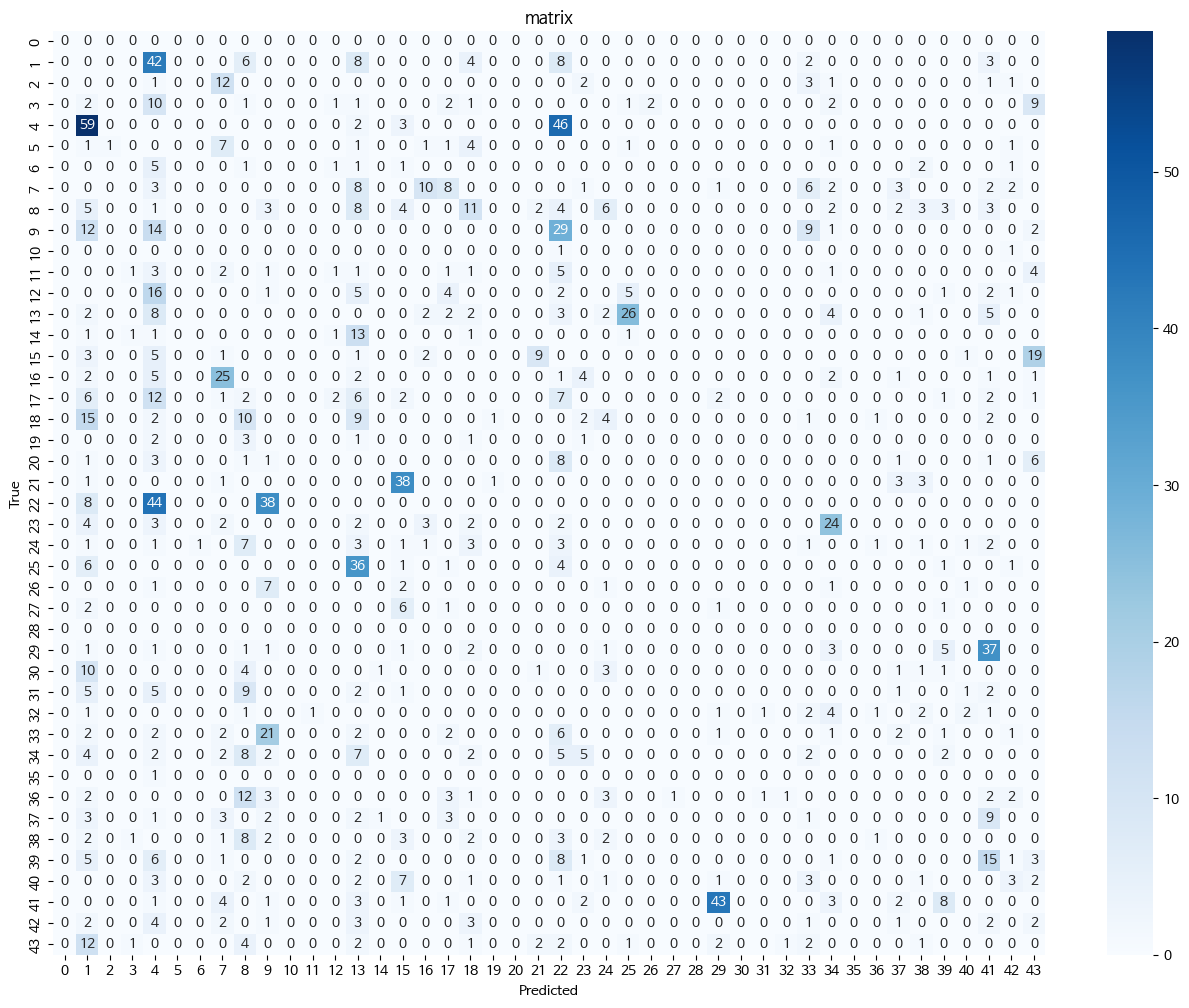

In [ ]:
import pandas as pd
from collections import Counter

# 틀린 예측만 추출
incorrect_indices = np.where(y_true != y_pred_classes)[0]
incorrect_true_labels = y_true[incorrect_indices]
incorrect_pred_labels = y_pred_classes[incorrect_indices]

# 각 클래스별로 틀린 예측을 카운트
incorrect_counts = {}
for true_label in np.unique(incorrect_true_labels):
    incorrect_preds = incorrect_pred_labels[incorrect_true_labels == true_label]
    incorrect_counter = Counter(incorrect_preds)
    most_common_incorrect = incorrect_counter.most_common(1)
    if most_common_incorrect:
        incorrect_counts[true_label] = most_common_incorrect[0]

# 결과를 데이터프레임으로 변환
incorrect_df = pd.DataFrame.from_dict(incorrect_counts, orient='index')

# 인덱스를 새로운 열로 만들기
incorrect_df.reset_index(inplace=True)
incorrect_df.columns = ['정답', '가장 많은 오답', '오답 횟수']

# 결과 출력
print("틀린 예측 중 가장 많이 틀린 예측 결과 테이블")
print("*" * 50)
display(incorrect_df.head(10))
print("*" * 200)

# incorrect_df의 각 행을 순회
for index, row in incorrect_df.iterrows():
    true_label = row['정답']
    most_common_incorrect = row['가장 많은 오답']
    count = row['오답 횟수']
    matrix[true_label][most_common_incorrect] += count

#매트릭스를 히트맵으로 출력
plt.figure(figsize=(16, 12))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('matrix')
plt.show()

# 딥 러닝을 활용한 분류 모델 실험 - 모형 구축 편
## LSTM 모형으로 학습

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 레이블 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['priority1'])
y = to_categorical(y_encoded)

# 최대 시퀀스 길이 정의
max_sequence_length = 100

# 패딩을 사용하여 시퀀스 길이를 동일하게 맞추기
X_padded = pad_sequences(X, maxlen=max_sequence_length, padding='post')

# 어휘 사전 크기 정의 (TF-IDF 벡터화 대신)
vocab_size = len(tfidf_vectorizer.vocabulary_)

# 모델 구축
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_padded, y, epochs=100, batch_size=128, validation_split=0.2)
print("*" * 200)

# 모델 평가
loss, accuracy = model.evaluate(X_padded, y)
print(f"모델의 정확도: {accuracy * 100:.2f}%")
print("*" * 200)


# 메롱 모드

In [ ]:
import pandas as pd
from kiwipiepy import Kiwi
from collections import Counter

# Kiwi 객체 생성
kiwi = Kiwi()

# 금지어 리스트 50
stopwords = ["생각", "진로", "직업", "학생", "상담", "관련", "관심", "학교", "감사", "대학",
             "시간", "공부", "분야", "학과", "학년", "선생", "이야기", "정보", "사람", "검사",
             "고민", "준비", "친구", "과목", "선택", "부분", "고등학교", "도움", "중요", "대학교",
             "성적", "진학", "전공", "정도", "안녕", "필요", "다양", "본인", "취업", "생활",
             "부모", "방법", "이모티콘", "경험", "이유", "안녕하세요", "내신", "방법", "경우", "얘기"]

# 키워드 추출 함수 정의
def extract_keywords(text, n=2):
    res = kiwi.tokenize(text)
    meishi_list = [r[0] for r in res if r[1] in ["NNG", "NNP"] and r[0] not in stopwords]
    keyword_counts = Counter(meishi_list)
    top_keywords = keyword_counts.most_common(n)
    return [keyword for keyword, count in top_keywords]

# 데이터프레임 가져오기
df = data_con_j

# df를 학생 번호와 full_text, job_label만 남기기
df = df[['student_idx', 'full_text', 'job_label']]

# df를 10행만 남기기
df = df.head(10)

# N개의 키워드를 추출하여 새로운 열에 추가
N = 7  # 원하는 키워드 개수
keyword_columns = [f'key{i+1}' for i in range(N)]
keyword_data = df['full_text'].apply(lambda x: pd.Series(extract_keywords(x, N)))

# 키워드 열을 원본 데이터프레임에 추가
df[keyword_columns] = keyword_data

# 결과 출력
display(df)


,student_idx,full_text,job_label,key1,key2,key3,key4,key5,key6,key7
0,0,학생 반갑습니다. 안녕하세요 학생이라고 불러도 되지요? 네 방학한 지 1주일 정도 ...,1,대학,검사,친구,직업,정도,공부,운동
1,1,학생 안녕하세요 안녕하세요 안내메세지 늦게 보내서 미안합니다. 아니요 괜찮습니다 이...,1,검사,대학,학교,선생,일,직업,결과
2,2,반가워요 [이모티콘] 학생 점심식사는 했나요? 아직이요. 상담 끝나고 먹으려고요! ...,1,선생,디자인,직업,검사,시간,공부,정도
3,3,반갑습니다. 진로상담 선생님입니다. 안녕하세요! 네~ 점심은 먹었어요? 네 먹었습니...,1,웹,취업,방송,디자인,직업,능력,스트리머
4,4,안녕하세요 네 안녕하세요 반갑습니다. 진로상담 선생님입니다 네 잘 부탁드립니다 좋아...,3,수학,과목,능력,대학,물리,과학,선택
5,5,안녕하세요. 학생 입장했나요? 네 반갑습니다. 저는 진로상담 선생님입니다. 호칭을 ...,1,취업,친구,학과,선생,금융,시험,선택
6,6,안녕하세요. 안녕하세요 반갑습니다. 진로상담 선생님입니다 네 오늘 하루 어떻게 보냈...,1,직업,진로,정보,관심,일본어,관련,일러스트레이터
7,7,안녕하세요. 학생 들어왔나요? 반갑습니다. 안녕하세요 진로상담 선생님입니다. 오늘 ...,3,연기,부모,학교,말씀,진로,회사,대학
8,8,안녕하세요. 안녕하세요. 진로 상담 선생님입니다. 반갑습니다. 네 호칭을 어떻게 부...,1,취업,운동,상담,선생,진로,금융,경영
9,9,학생 입장 환영해요~ 채팅방 들어오기가 어려웠나요? 안녕하세요 프로필을 안 눌렀습니...,0,개발,분야,군인,이야기,직업,전공,부사관


In [ ]:
import pandas as pd
from kiwipiepy import Kiwi
from collections import Counter
import matplotlib.pyplot as plt

# Kiwi 초기화
kiwi = Kiwi()

# 키워드 추출 함수 정의
def extract_keywords(text, n=20):
    res = kiwi.tokenize(text)
    meishi_list = [r[0] for r in res if r[1] in ["NNG", "NNP"]]
    keyword_counts = Counter(meishi_list)
    top_keywords = keyword_counts.most_common(n)
    return [keyword for keyword, count in top_keywords]

# 데이터프레임 가져오기
df = data_con_j

# df를 학생 번호와 full_text, job_label만 남기기
df = df[['student_idx', 'full_text', 'job_label']]

# # df를 500행만 남기기
# df = df.head(500)

# 모든 키워드를 저장할 리스트
all_keywords = []

# 각 학생의 요약문에서 상위 20개 키워드 추출
for summery in df['full_text']:
    keywords = extract_keywords(summery, n=30)
    all_keywords.extend(keywords)

# 키워드 빈도 계산
keyword_counts = Counter(all_keywords)

# 빈도수가 높은 순으로 정렬
sorted_keywords = keyword_counts.most_common()

# 데이터프레임으로 변환
keyword_df = pd.DataFrame(sorted_keywords, columns=['Keyword', 'Count'])

# 상위 40개만 잘라, 금지어 리스트로 만들기. 단어 하나하나 일일이 리스트에 추가.
stopwords = keyword_df['Keyword'].head(40)

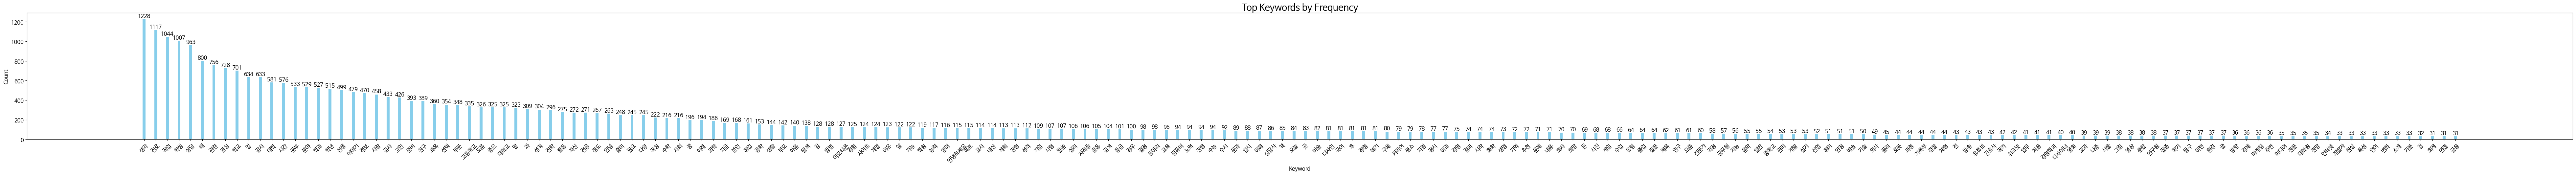

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
keywords = keyword_df['Keyword']
counts = keyword_df['Count']

# 표시할 데이터의 범위 설정
start_idx = 0
end_idx = 200

# 막대와 막대 사이의 간격을 넓히기 위해 x축 위치 조정
# x = np.arange(len(keywords))
x = np.arange(end_idx)
bar_width = 1  # 막대의 너비 설정
spacing = 3  # 막대 사이의 간격 설정

# 시각화
plt.figure(figsize=(100, 5))  # 그래프 크기 조정

bars = plt.bar(x * (1 + spacing), counts[start_idx:end_idx], width=bar_width, color='skyblue')  # 막대의 너비와 색상 조정
plt.xticks(x * (1 + spacing), keywords[start_idx:end_idx], rotation=45, fontsize=12)  # x축 눈금 글씨 크기 조정 및 위치 설정
plt.yticks(fontsize=12)  # y축 눈금 글씨 크기 조정
plt.xlabel('Keyword', fontsize=12)  # x축 레이블 글씨 크기 조정
plt.ylabel('Count', fontsize=12)  # y축 레이블 글씨 크기 조정
plt.title('Top Keywords by Frequency', fontsize=20)  # 제목 글씨 크기 조정

# 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.show()



# 메롱 모드 2 - 워드투벡터 벡터화 시도

In [ ]:
! pip install gensim

In [ ]:
from gensim.models import KeyedVectors
from konlpy.tag import Okt
import numpy as np

# 사전 학습된 Word2Vec 모델 로드
model_path = "/content/ko.bin"
model = KeyedVectors.load_word2vec_format(model_path, binary=True)

# 형태소 분석기 선언
okt = Okt()

# 단어를 벡터로 변환하는 함수
def word_to_vector(word):
    try:
        tokens = okt.morphs(word)
        vectors = [model[token] for token in tokens if token in model]
        if vectors:
            return np.mean(vectors, axis=0)
        else:
            return np.zeros(model.vector_size)
    except KeyError:
        return np.zeros(model.vector_size)

# 예제 단어 벡터화
word = '학교'
vector = word_to_vector(word)
print(f"벡터화된 '{word}' 단어의 벡터:\n{vector}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/ko.bin'